In [1]:
# import packages
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. 
# As we mentioned previously, Logistic Regression is only applicable to binary classification problems. 
# Thus, the data points are composed of two classes.

In [4]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,     # The fraction of samples whose class are randomly exchanged (float)
                     # Larger values introduce noise in the labels and make the classification task harder
    n_informative=1, # n_informative : int, optional (default=2)
                     # The number of informative features. Each class is composed of a number
                     # of gaussian clusters each located around the vertices of a hypercube
                     # in a subspace of dimension ``n_informative``. For each cluster,
                     # informative features are drawn independently from  N(0, 1) and then
                     # randomly linearly combined within each cluster in order to add
                     # covariance. The clusters are then placed on the vertices of the hypercube
    n_redundant=0,   # The number of redundant features. These features are generated as
                     # random linear combinations of the informative features.
    n_repeated=0     # The number of duplicated features, drawn randomly from the informative
                     # and the redundant features.
)

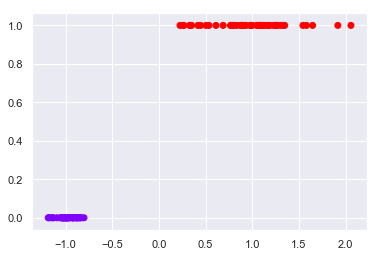

In [6]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow');

In [9]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((75, 1), (25, 1), (75,), (25,))

In [20]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features 
# and the labels (since Logistic Regression is a supervised machine learning algorithm) as arguments.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')  # Default solver will change from ‘liblinear’ to ‘lbfgs’ in 0.22.
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
import sklearn
sklearn.__version__

'0.21.3'

In [21]:
# We can access the following properties to actually view the coefficient for the slope and y-intercept 
# of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[3.27499096]]
[0.30733466]


In [23]:
# Let’s see how the model performs against data that it hasn’t been trained on.
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0])

In [24]:
# Given that this consists of a classification problem, 
# we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)

array([[13,  0],
       [ 0, 12]])

In [25]:
# If for whatever reason we’d like to check the actual probability that a data 
# point belongs to a given class, we can use the predict_proba function.
# first column is probability of y=0, second column is probability of y=1 (for a given x value = row)

y_pred_proba = lr.predict_proba(x_test)
y_pred_proba

array([[0.9699798 , 0.0300202 ],
       [0.95709339, 0.04290661],
       [0.01304281, 0.98695719],
       [0.93912718, 0.06087282],
       [0.96335382, 0.03664618],
       [0.95407136, 0.04592864],
       [0.01798254, 0.98201746],
       [0.95445082, 0.04554918],
       [0.0212143 , 0.9787857 ],
       [0.95764504, 0.04235496],
       [0.02326863, 0.97673137],
       [0.02112785, 0.97887215],
       [0.95080841, 0.04919159],
       [0.0210242 , 0.9789758 ],
       [0.9720957 , 0.0279043 ],
       [0.9286833 , 0.0713167 ],
       [0.12373446, 0.87626554],
       [0.95368997, 0.04631003],
       [0.03917612, 0.96082388],
       [0.00467481, 0.99532519],
       [0.95579274, 0.04420726],
       [0.00413789, 0.99586211],
       [0.00333255, 0.99666745],
       [0.18946257, 0.81053743],
       [0.93013976, 0.06986024]])

In [38]:
# The first column corresponds to the probability that the sample belongs to the first class and the
# second column corresponds to the probability that the sample belongs to the second class.
# Hence, the sum over all columns should give a probability of one (for each row). Check this:
import numpy as np
np.sum(y_pred_proba, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
# Before attempting to plot the Sigmoid function, we create and DataFrame containing our test data.

df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})  # 2 columns: x values and corresponding labels of test set
df = df.sort_values(by='x')
df.head()

,x,y
14,-1.178021,0
0,-1.155038,0
4,-1.092048,0
9,-1.046026,0
1,-1.041899,0


In [54]:
# Using the sigmoid (expit) function, we calculate for each x the probability to belong to class y=1

from scipy.special import expit

# The expit function, also known as the logistic function, is defined as
# expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function.

regression_function = df.x * lr.coef_[0][0] + lr.intercept_[0]  # 3.25*x + 0.31
sigmoid_function = expit(regression_function).ravel()  # ravel flattens the data to an ndarray - from (25,) to (25,)?
sigmoid_function                                       # not necessary here

array([0.0279043 , 0.0300202 , 0.03664618, 0.04235496, 0.04290661,
       0.04420726, 0.04554918, 0.04592864, 0.04631003, 0.04919159,
       0.06087282, 0.06986024, 0.0713167 , 0.81053743, 0.87626554,
       0.96082388, 0.97673137, 0.9787857 , 0.97887215, 0.9789758 ,
       0.98201746, 0.98695719, 0.99532519, 0.99586211, 0.99666745])

In [68]:
# The result of our sigmoid function is the same as the result from sklearn's predict_proba method
sorted(sigmoid_function) == sorted(y_pred_proba[:,1])  # take second column, which is probability of y=1

True

In [70]:
# check again that both - sigmoid function per hand and sklearn's predict_proba function - return same values
print(sorted(sigmoid_function)[:5])
print(sorted(y_pred_proba[:,1])[:5])

[0.027904299754192667, 0.03002020093360029, 0.036646175416515596, 0.04235496171991115, 0.04290660555057416]
[0.027904299754192667, 0.03002020093360029, 0.036646175416515596, 0.04235496171991115, 0.04290660555057416]


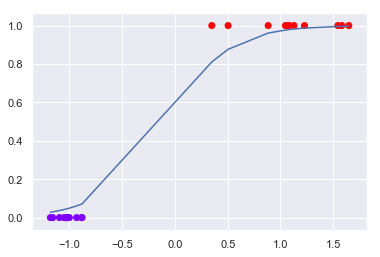

In [76]:
plt.plot(df.x, sigmoid_function)
plt.scatter(df.x, df.y, c=df.y, cmap='rainbow'); # edgecolors='k');